# Problems for Session 3/ Week 3 in Computational Economics

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

### Table of Contents

* [Problem 1 - The Secant Method](#Problem1)
        
* [Problem 2 -  A function maximization routine using the secant method.](#Problem2)

* [Problem 3 -  Implicit functions, Newton’s method.](#Problem3)
    
* [Problem 4 -  Stability and Newton’s method.](#Problem4)
   

### Problem 1 - The secant method.<a class="anchor" id="Problem1"></a>

[[Back to TOC]](#Table-of-Contents)

#### Problem 1a

You want to solve an equation, say e(x)=4x. Implement the solution with the secant method without using preprogrammed solvers (such as the one in the lecture notes). Using x=0 as point number 1 and x=1 as point number 2.

In [2]:
def func1(x):
    f_x = np.exp(x) - (4 * x) 
    return f_x


In [3]:
x_1 = 0
x_2 = 1
f_x_1 = func1(x_1)

while (abs(f_x_1) > 1e-8):
    f_x_2 = func1(x_2)
    x_new = x_1 - f_x_1 * (x_2 - x_1) / (f_x_2 - f_x_1) #The secant formula
    #Replace old X's
    x_1 = x_2
    f_x_1 = f_x_2
    x_2 = x_new
    print(f"f(x) when x = {x_new} is equal to: {(f_x_2)}")

print(f'Your "zero" is located at: [{x_2},{f_x_2}]')
    


f(x) when x = 0.43826622081229755 is equal to: -1.281718171540955
f(x) when x = 0.33252629017216206 is equal to: -0.20304738383463672
f(x) when x = 0.3579823559598122 is equal to: 0.0643813993060991
f(x) when x = 0.35740690574934914 is equal to: -0.0014890423295865762
f(x) when x = 0.3574029555447807 is equal to: -1.0151911632005906e-05
f(x) when x = 0.35740295618138956 is equal to: 1.6363301824640075e-09
Your "zero" is located at: [0.35740295618138956,1.6363301824640075e-09]


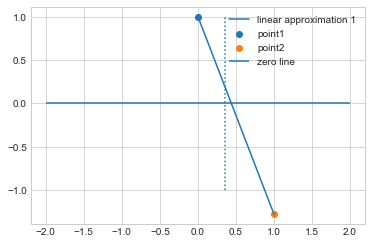

In [4]:
plt.scatter(0, 1, label = 'point1')
plt.scatter(1, -1.2817, label = 'point2')
plt.hlines(0, -2, 2, label = 'zero line')
plt.plot([0, 1], [1, -1.2817], label = 'linear approximation 1')
plt.vlines(x_new, -1, 1, linestyles='dotted' )
plt.legend(loc='upper right')


#### Problem 1b

Improve point a: For each iteration in your algorithm print out iteration number, point number 1, point number 2, the distance between the two points and the value of between e(x)-4x.

https://personal.math.ubc.ca/~pwalls/math-python/roots-optimization/secant/

In [5]:
x1 = 0
x2 = 1
f_x_1 = func1(x1)

i = 0

while (abs(f_x_1) > 1e-8):
    i += 1
    f_x_2 = func1(x2)
    x_new = x1 - f_x_1 * (x2 - x1) / (f_x_2 - f_x_1) #The secant formula
    #Replace values 
    x1 = x2
    f_x_1 = f_x_2
    x2 = x_new
    print(f'Iteration number: {i} | x1 = {x1:.4f} | x2 = {x2:.4f} | distance between Xs =  {(x1 - x2):.6f} | f(x) = {f_x_2:.8f}')


Iteration number: 1 | x1 = 1.0000 | x2 = 0.4383 | distance between Xs =  0.561734 | f(x) = -1.28171817
Iteration number: 2 | x1 = 0.4383 | x2 = 0.3325 | distance between Xs =  0.105740 | f(x) = -0.20304738
Iteration number: 3 | x1 = 0.3325 | x2 = 0.3580 | distance between Xs =  -0.025456 | f(x) = 0.06438140
Iteration number: 4 | x1 = 0.3580 | x2 = 0.3574 | distance between Xs =  0.000575 | f(x) = -0.00148904
Iteration number: 5 | x1 = 0.3574 | x2 = 0.3574 | distance between Xs =  0.000004 | f(x) = -0.00001015
Iteration number: 6 | x1 = 0.3574 | x2 = 0.3574 | distance between Xs =  -0.000000 | f(x) = 0.00000000


#### Problem 1c

Say you want to maximize the function e(x)-2x^2. Can you just use the code from a. and b. or do you need more? Please implement a version where you also print out the function value at each iteration. Is this useful?

Yes, Taking the derivative of $$ f(x) = e^{x}-2x^{2} $$ will give us the FOC of the maximization problem, that is $$ f'(x) = e^{x} - 4x = 0 $$ which is similar as above. Hence: 

In [6]:
x1 = 0
x2 = 1
f_x_1 = func1(x1)

i = 0
while (abs(f_x_1) > 1e-8):
    i += 1
    f_x_2 = func1(x2)
    x_new = x1 - f_x_1 * (x2 - x1) / (f_x_2 - f_x_1) #The secant formula
    #Replace values 
    x1 = x2
    f_x_1 = f_x_2
    x2 = x_new
    print(f'Iteration Number: {i} | x1 = {x1:.4f} | x2 = {x2:.4f} | distance between Xs =  {(x1 - x2):.6f} | FOC = {f_x_2:.8f} |f(x) = {(np.exp(x2)-(2*x2**2)):6.4f}')


Iteration Number: 1 | x1 = 1.0000 | x2 = 0.4383 | distance between Xs =  0.561734 | FOC = -1.28171817 |f(x) = 1.1659
Iteration Number: 2 | x1 = 0.4383 | x2 = 0.3325 | distance between Xs =  0.105740 | FOC = -0.20304738 |f(x) = 1.1733
Iteration Number: 3 | x1 = 0.3325 | x2 = 0.3580 | distance between Xs =  -0.025456 | FOC = 0.06438140 |f(x) = 1.1741
Iteration Number: 4 | x1 = 0.3580 | x2 = 0.3574 | distance between Xs =  0.000575 | FOC = -0.00148904 |f(x) = 1.1741
Iteration Number: 5 | x1 = 0.3574 | x2 = 0.3574 | distance between Xs =  0.000004 | FOC = -0.00001015 |f(x) = 1.1741
Iteration Number: 6 | x1 = 0.3574 | x2 = 0.3574 | distance between Xs =  -0.000000 | FOC = 0.00000000 |f(x) = 1.1741


#### Problem 1d

Change the function to be maximized to the third order polynomial from Session 1, Problem 4. Show that whether you find the maximum depends on the starting values.

Suppose we have a function $$ f(x) = x^3 + x^2 - x + 1 $$ If we take the derivative of the function will give us our FOC for maximization, hence: $$ f'(x) = 3x^2 + 2x - 1 = 0 $$

In [38]:
def foc(x):
    deri_fx = 3 * x ** 2 + 2 * x - 1
    return deri_fx


In [39]:
x1 = 0 
x2 = 1 
f1 = foc(x1)

i = 0 
while (abs(f1)>1e-8): 
    i += 1 
    f2 = foc(x2)
    xnew = x1 - f1 * (x2 - x1)/(f2 - f1) #The secant formula
    x1 = x2
    f1 = f2
    x2 = xnew 
    print(f'Iteration number {i} | x1 = {x1:6.4f} | x2 = {x2:6.4f} | distance between Xs = {(x1 - x2):6.4f} | FOC = {f2:6.4f} | f(x) = {(xnew ** 3 + xnew ** 2 - xnew + 1):6.4f}')

Iteration number 1 | x1 = 1.0000 | x2 = 0.2000 | distance between Xs = 0.8000 | FOC = 4.0000 | f(x) = 0.8480
Iteration number 2 | x1 = 0.2000 | x2 = 0.2857 | distance between Xs = -0.0857 | FOC = -0.4800 | f(x) = 0.8192
Iteration number 3 | x1 = 0.2857 | x2 = 0.3388 | distance between Xs = -0.0531 | FOC = -0.1837 | f(x) = 0.8149
Iteration number 4 | x1 = 0.3388 | x2 = 0.3331 | distance between Xs = 0.0057 | FOC = 0.0221 | f(x) = 0.8148
Iteration number 5 | x1 = 0.3331 | x2 = 0.3333 | distance between Xs = -0.0002 | FOC = -0.0008 | f(x) = 0.8148
Iteration number 6 | x1 = 0.3333 | x2 = 0.3333 | distance between Xs = -0.0000 | FOC = -0.0000 | f(x) = 0.8148
Iteration number 7 | x1 = 0.3333 | x2 = 0.3333 | distance between Xs = 0.0000 | FOC = 0.0000 | f(x) = 0.8148


Plotting the FOC

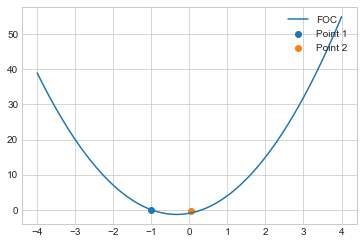

In [40]:
x = np.linspace(-4, 4, 100)
y = foc(x)
plt.plot(x, y, label = 'FOC')
plt.scatter(-1, 0, label = 'Point 1')
plt.scatter(0.05, -0.33, label = 'Point 2')
plt.legend(loc = 'upper right')

From the graph, we saw that between x = -1 and x = 0.5, so to find the candidate point for maximimum we used the secand method

In [41]:
x1 = -1.2
x2 = -0.8
f1 = foc(x1)

i = 0 
while (abs(f1)>1e-8): 
    i += 1 
    f2 = foc(x2)
    xnew = x1 - f1 * (x2 - x1)/(f2 - f1) #The secant formula
    x1 = x2
    f1 = f2
    x2 = xnew 
    print(f'Iteration number {i} | x1 = {x1:6.4f} | x2 = {x2:6.4f} | distance between Xs = {(x1 - x2):6.4f} | FOC = {f2:6.4f} | f(x) = {(xnew ** 3 + xnew ** 2 - xnew + 1):6.4f}')

Iteration number 1 | x1 = -0.8000 | x2 = -0.9700 | distance between Xs = 0.1700 | FOC = -0.6800 | f(x) = 1.9982
Iteration number 2 | x1 = -0.9700 | x2 = -1.0054 | distance between Xs = 0.0354 | FOC = -0.1173 | f(x) = 1.9999
Iteration number 3 | x1 = -1.0054 | x2 = -0.9999 | distance between Xs = -0.0056 | FOC = 0.0218 | f(x) = 2.0000
Iteration number 4 | x1 = -0.9999 | x2 = -1.0000 | distance between Xs = 0.0001 | FOC = -0.0005 | f(x) = 2.0000
Iteration number 5 | x1 = -1.0000 | x2 = -1.0000 | distance between Xs = 0.0000 | FOC = -0.0000 | f(x) = 2.0000
Iteration number 6 | x1 = -1.0000 | x2 = -1.0000 | distance between Xs = -0.0000 | FOC = 0.0000 | f(x) = 2.0000


### Problem 2 - A function maximization routine using the secant method. <a class="anchor" id="Problem2"></a>

[[Back to TOC]](#Table-of-Contents)

#### Problem 2a

Implement two function maximizers based on the secant method (like the ones we made for Newton’s method in the lectures), one that calculates derivatives numerically, and one where the user needs to code the derivative of the function.

In [42]:
def func2(x, empty): 
    fval = np.exp(x) - 2 * x ** 2
    fder = np.exp(x) - 4 * x
    return fval, fder

In [98]:
def our_secant_maximizer_a(funcname, startold, startnew, arglist): #Analytical Approach
    
    ''' funcname = The function we are trying to maximize
    since in our secant method we need to guess 2 values of x's wherein our root lies, then:
    
        startold = The initial value of x 
        startnew = The other value of x
        arglist = List of aguments to pass 
        
    However, do note that in the function we define the other argument is empty, 
    then the arglist is just an empty list'''
    
    old = startold
    new = startnew
    fvalold, derold = funcname(old, arglist) #In maximization we need the FOC, hence we have the derivative
    fvalnew, dernew = funcname(new, arglist)
    
    #The algorithm 
    while (abs(dernew) > 1e-8):
        brandnew = old - derold * (new - old) / (dernew - derold)
        fvalbrandnew, derbrandnew = funcname(brandnew, arglist)
        old = new 
        derold = dernew
        new = brandnew
        dernew = derbrandnew
    
    return new
    

In [99]:
our_secant_maximizer_a(func2, 0, 3, [])

0.357402953282751

Now a solver secant method that takes a numerical derivative: 

In [103]:
def our_secant_maximizer_n(funcname, startold, startnew, arglist): #Numerical approach without defining the derivative
    
    old = startold 
    new = startnew 
    
    fvalold = funcname(old, arglist)
    
    #Taking the uncertainty +/- of the orginal function
    fvalold1 = funcname(old-(1e-5) * 0.5, arglist) 
    fvalold2 = funcname(old+(1e-5) * 0.5, arglist)
    
    derold = (fvalold2 - fvalold1) * 1e+5  #The numerical derivative which by definition approx. to fvalold.
    
    fvalnew = funcname(new, arglist)
    
    fvalnewd1 = funcname(new-(1e-5) * 0.5, arglist)
    fvalnewd2 = funcname(new+(1e-5) * 0.5, arglist)
    
    dernew = (fvalnewd2 - fvalnewd1) * 1e+5 
    
    #The algorithm 
    while (abs(dernew) > 1e-8): #We use dernew to satisfy the FOC
        brandnew = old - derold * (new - old) / (dernew - derold)
        fvalbrandnew = funcname(brandnew, arglist)
        fvalbrandnewd1 = funcname(brandnew-(1e-5) * 0.5, arglist)
        fvalbrandnewd2 = funcname(brandnew+(1e-5) * 0.5, arglist)
        
        derbrandnew = (fvalbrandnewd1 - fvalbrandnewd2) * 1e+5
        
        old = new
        derold = dernew
        new = brandnew
        dernew = derbrandnew
        
    return new
    

In [104]:
def testfunc_n(x, empty): 
    fx = np.exp(x) - 2 * x ** 2
    return fx


In [105]:
our_secant_maximizer_n(testfunc_n, 0, 3, [])

0.35740295444262066

### Problem 3 - Implicit functions, Newton’s method.  <a class="anchor" id="Problem3"></a>

[[Back to TOC]](#Table-of-Contents)

#### Problem 3a

We want to define a function y=f(a) implicitly, where y is given by the solution of the equation log (x) + ax^2 = 0. Make a nice graph of this function.

In [111]:
def our_newton_solver(funcname, startvalue, arglist):
    
    current = startvalue
    fval = funcname(current, arglist)
    #Gradient of the function
    grad = (funcname(current+0.5*1e-5, arglist) - funcname(current-0.5*1e-5, arglist)) * 1e+5 
    
    while (abs(fval) > 1e-8):
        
        current = current - fval/grad #Newton's formula
        fval = funcname(current, arglist)
        grad = (funcname(current+0.5*1e-5, arglist) - funcname(current-0.5*1e-5, arglist)) * 1e+5  
        
    return current


In [112]:
def innerfunction(x, a):
    ga = np.log(x) + (a * x ** 2)
    return ga


In [113]:
innerfunction(1, 4)

4.0

In [117]:
def outerfunction(a):
    fa = our_newton_solver(innerfunction, 1, a)
    return fa


In [118]:
outerfunction(2)

0.5482170813639983

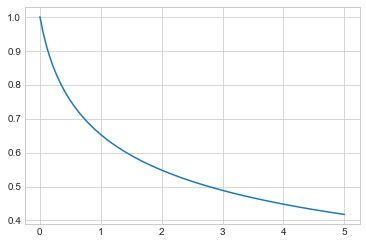

In [119]:
x = np.linspace(0, 5, 100)
y = np.zeros(100)

for i in range(100):
    y[i] = outerfunction(x[i])
    
plt.plot(x, y)


In [120]:
innerfunction(0.54821708, 2)


-5.479131037766649e-09

#### Problem 3b

In a consumer choice problem, a consumer’s demand curve can be characterized by the implicit function x = f(p) where x is given by the z that maximizes 0.5*log(z)+0.5log(20-p*z). (Much more on this very soon!) Please graph this function. (This is a demand function.)

In [121]:
def our_newton_maximizer(funcname, startvalue, arglist):
    
    current = startvalue
    fval = funcname(current, arglist)
    #Gradient of the function
    grad = (funcname(current+0.5*1e-5, arglist) - funcname(current-0.5*1e-5, arglist)) * 1e+5
    
    
    secgrad1 = (funcname(current+0.5*1e-5+0.5*1e-5, arglist) - funcname(current-0.5*1e-5+0.5*1e-5, arglist)) * 1e+5
    secgrad2 = (funcname(current+0.5*1e-5-0.5*1e-5, arglist) - funcname(current-0.5*1e-5-0.5*1e-5, arglist)) * 1e+5
    secderiv = (secgrad1 - secgrad2) * 1e+5
    
    while (abs(grad)>1e-8):
        
        current = current - grad/secderiv #Newton's formula
        fval = funcname(current, arglist)
        grad = (funcname(current+0.5*1e-5, arglist) - funcname(current-0.5*1e-5, arglist)) * 1e+5
        
        secgrad1 = (funcname(current+0.5*1e-5+0.5*1e-5, arglist) - funcname(current-0.5*1e-5+0.5*1e-5, arglist)) * 1e+5
        secgrad2 = (funcname(current+0.5*1e-5-0.5*1e-5,arglist) - funcname(current-0.5*1e-5-0.5*1e-5, arglist)) * 1e+5
        secderiv = (secgrad1-secgrad2) * 1e+5

    return current

In [123]:
def utility_with_budget_init(z,p): #The inner function
    
    ''' z is the number that maximizes the budget and p is the parameter we pass to maximize the utility function '''
    
    ufunct = 0.5 * np.log(z) + 0.5 * np.log(20 - p*z)
    return ufunct

def demand(p): #The outerfunction, 
    demand = our_newton_maximizer(utility_with_budget_init, 1, p)
    return demand

In [124]:
print(demand(1)) #If price is 1 then Qd is 10
print(demand(1.1)) #If price is 1 then Qd is 9.09

10.000000000166496
9.090909087840851


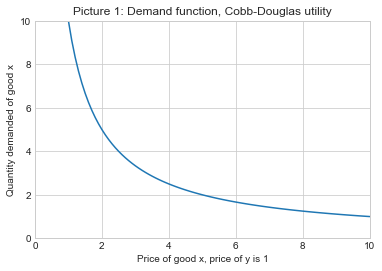

In [125]:
prices = np.linspace(0.1, 10, 100)
demands = np.zeros(100)

for i in range(100):
    demands[i] = demand(prices[i])
    
plt.plot(prices, demands)

plt.ylim(0, 10)
plt.xlim(0, 10)
plt.title("Picture 1: Demand function, Cobb-Douglas utility")
plt.xlabel("Price of good x, price of y is 1")
plt.ylabel("Quantity demanded of good x")
plt.savefig('demand.png')

The graph above shows the demand function as a function or price (or w.r.t price).

#### Problem 3c

In a consumer choice problem, we want to make a curve characterized by 0.5 log(x) + 0.5 log(w) = 10. Please graph this curve. (This is an indifference curve).

In [126]:
def indiff(w, x): #The inner function
    ifunct1 = 0.5*np.log(x) + 0.5*np.log(w) - 10
    return ifunct1

def indiffw(x): #The outer function 
    ifunct2 = our_newton_solver(indiff, 1, x)
    return ifunct2

In [127]:
indiffw(10000) #10K unit of x, yields 48K unit of y 

48516.51953931566

(0.0, 200000.0)

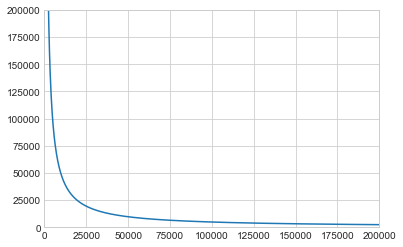

In [128]:
x = np.linspace(1, 200000, 1000)
w = np.zeros(1000)

for i in range(1000):
    w[i] = indiffw(x[i])

plt.plot(x, w)
plt.ylim(0, 200000)
plt.xlim(0, 200000)

The above is an indifference curve.

#### Problem 3d

In a consumer choice problem, we want to find the value of 0.5 log(x) + 0.5 log(w), when x is given as in 3b and w = 20 - p*x. Please graph this function. (This is an indirect utility function, where in it takes income and price as an argument)



In [90]:
def indirect_utility(p):
    x = our_newton_maximizer(utility_with_budget_init, 1, p)
    return utility_with_budget_init(x, p)  

In [91]:
indirect_utility(3)

1.753278948659991

Text(0, 0.5, 'Utility when maximized')

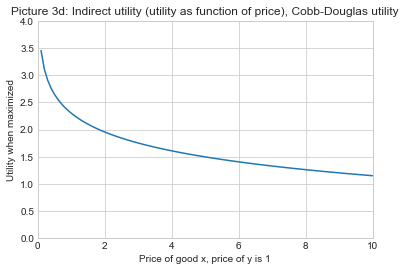

In [92]:
prices = np.linspace(0.1,10,100)
utilities = np.zeros(100)

for i in range(100):
    utilities[i] = indirect_utility(prices[i])

plt.plot(prices, utilities)
plt.ylim(0, 4)
plt.xlim(0, 10)
plt.title("Picture 3d: Indirect utility (utility as function of price), Cobb-Douglas utility")
plt.xlabel("Price of good x, price of y is 1")
plt.ylabel("Utility when maximized")

#### Problem 3e

In a consumer choice problem, we want to find the income that together with the prices given lead to a certain utility level. In other words we want to find the value I, such that 0.5 log(x) + 0.5 log(w) = u, when x is given as in 3b and w = I - p*x. Please graph this function 


So to answer this problem, we need to find the amount of income that is necessary to produce a certain amount of utility (given the prices). First, I extend the 3b-stuff to allow the income as an argument in the demand function

In [93]:
def utility_with_budget_init2(z, mylist):
    p = mylist[0]
    I = mylist[1]
    funct = 0.5 * np.log(z) + 0.5 * np.log(I-p*z)
    return funct

def demand2(p, I):
    demand2 = our_newton_maximizer(utility_with_budget_init2, 1, [p,I])
    return demand2

In [94]:
demand2(2, 11)

2.7499999898361702

In [129]:
def target(income, u):
    x = demand2(1, income)
    tar = utility_with_budget_init2(x, [1,income]) - u
    return tar

def required_income(u):
    Ireq = our_newton_solver(target, 10, u)
    return Ireq

In [130]:
required_income(3)

40.17107384377623

Text(0, 0.5, 'Required income')

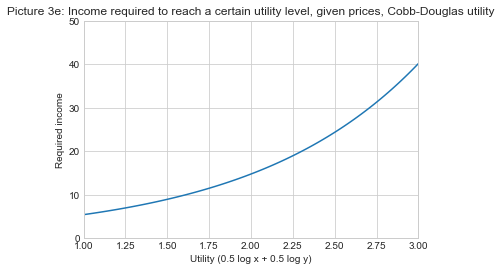

In [97]:
utils = np.linspace(1, 3, 100)
reqinc = np.zeros(100)

for i in range(100):
    reqinc[i] = required_income(utils[i])
    
plt.plot(utils, reqinc)
plt.ylim(0, 50)
plt.xlim(1, 3)
plt.title("Picture 3e: Income required to reach a certain utility level, given prices, Cobb-Douglas utility")
plt.xlabel("Utility (0.5 log x + 0.5 log y)")
plt.ylabel("Required income")

### Problem 4  - Stability and Newton’s method. <a class="anchor" id="Problem4"></a>

Newton’s method does not work well if the function we want to maximize is not well approximated by a quadratic function. A key difference between algorithms made for solving equations and function maximizers is that when we want to maximize a function we can check whether we are moving upwards.

[[Back to TOC]](#Table-of-Contents)

#### Problem 4a

Redo problem 1d now using Newton’s method. Characterize how what happens depend on the starting value. (There should be a set of starting values that lead us to the local maximum and a set of starting values that lead us to the local minimum and there should be sets of starting values for which the function does not converge.)

#### Problem 4b

Implement a new version of the function maximization routine with the following improvement: Do not automatically accept a new point based on the standard “Newton formula”. Instead: If the current accepted point is x_i, if x_(i+1) does not lead to a higher function value, choose a new x_(i+1) halfway between x_i and x_(i+1). Do this iteratively until you get an increase in function value. (In both problems 4b and 4c, make sure to get output from the routine, so that we can study what is going on).

#### Problem 4c

Implement a new version of the function maximization routine with the following improvement: Introduce the concept of a “trust region”. We are only willing to assume that the quadratic approximation of the function holds within this region. Say the trust region is only a distance of 0.1 from the current value. So if the Newton step is longer than that, just move 0.1 in the same direction as the Newton step.